<Figure size 1200x800 with 0 Axes>

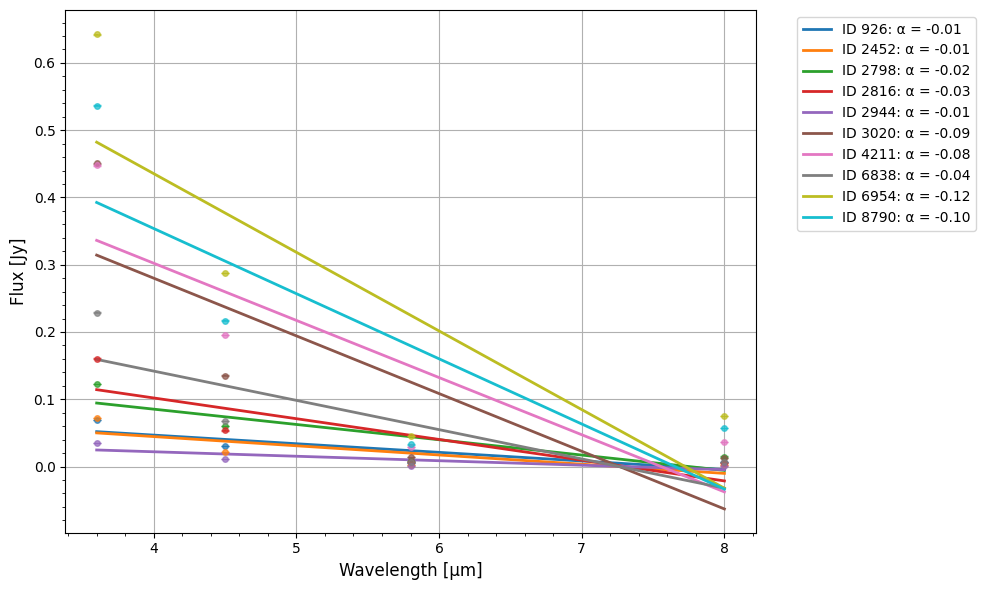


Spectral Index Classification:
Class I: α > 0.3 (rising SED)
Flat spectrum: 0.3 > α > -0.3
Class II: -0.3 > α > -1.6 (falling SED)
Class III: α < -1.6 (steep decline)
----------------------------------------
ID 926: α = -0.013 (Flat spectrum)
ID 2452: α = -0.014 (Flat spectrum)
ID 2798: α = -0.023 (Flat spectrum)
ID 2816: α = -0.031 (Flat spectrum)
ID 2944: α = -0.007 (Flat spectrum)
ID 3020: α = -0.086 (Flat spectrum)
ID 4211: α = -0.085 (Flat spectrum)
ID 6838: α = -0.044 (Flat spectrum)
ID 6954: α = -0.117 (Flat spectrum)
ID 8790: α = -0.097 (Flat spectrum)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt

def flux(F0, m):
    return F0 * 10**(-m/2.5)

def flux_err(F0, m, m_err):
    return abs((-np.log(10)/2.5) * F0 * 10**(-m/2.5) * m_err)

def linear_fit(x, a, b):
    return a * x + b

def main():
    try:
        phot_data = np.genfromtxt('table.txt',
            dtype=[('ID', 'i4'), ('X_pos', 'f4'), ('Y_pos', 'f4'),
                   ('Mag_1', 'f4'), ('Mag_err_1', 'f4'),
                   ('Mag_2', 'f4'), ('Mag_err_2', 'f4'),
                   ('Mag_3', 'f4'), ('Mag_err_3', 'f4'),
                   ('Mag_4', 'f4'), ('Mag_err_4', 'f4')],
            comments='#')
        
        band_data = np.genfromtxt('wavelength-flux.txt',
            dtype=[('Band', 'U10'), ('wavelength', 'f4'), ('flux_density', 'f4')],
            comments='#')
        
        # Create single figure for all sources
        plt.figure(figsize=(12, 8))
        
        # Colors for different sources
        colors = plt.cm.tab10(np.linspace(0, 1, len(phot_data)))
        plt.figure(figsize=(10,6))
        for idx, source in enumerate(phot_data):
            wl_list, F_list, F_err_list = [], [], []
            
            # Calculate flux for each IRAC band
            for j in range(4):
                band = band_data[3 + j]
                F = flux(band['flux_density'], source[f'Mag_{j+1}'])
                F_err = flux_err(band['flux_density'], 
                                source[f'Mag_{j+1}'], 
                                source[f'Mag_err_{j+1}'])
                wl_list.append(band['wavelength'])
                F_list.append(F)
                F_err_list.append(F_err)
            
            # Plot data points with error bars
            plt.errorbar(wl_list, F_list, yerr=F_err_list, 
                        fmt='o', capsize=3, color=colors[idx], 
                        markersize=4, alpha=0.7)
            
            # Fit linear trend and calculate spectral index
            params, _ = opt.curve_fit(linear_fit, wl_list, F_list, p0=[0, 0])
            spectral_index = params[0]  # slope = spectral index
            
            # Plot linear fit
            wl_range = np.linspace(min(wl_list), max(wl_list), 100)
            
            plt.plot(wl_range, linear_fit(wl_range, *params), 
                    color=colors[idx], linewidth=2, 
                    label=f'ID {source["ID"]}: α = {spectral_index:.2f}')
        
        plt.xlabel('Wavelength [μm]', fontsize=12)
        plt.ylabel('Flux [Jy]', fontsize=12)
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
        plt.grid(True)
        plt.tight_layout()
        plt.minorticks_on()
        
        # Save the combined plot
        plt.savefig('all_sources_spectral_fits.png', dpi=200, bbox_inches='tight')
        plt.show()
        
        # Print spectral indices for classification
        print("\nSpectral Index Classification:")
        print("Class I: α > 0.3 (rising SED)")
        print("Flat spectrum: 0.3 > α > -0.3")
        print("Class II: -0.3 > α > -1.6 (falling SED)")
        print("Class III: α < -1.6 (steep decline)")
        print("-" * 40)
        
        for idx, source in enumerate(phot_data):
            wl_list, F_list = [], []
            for j in range(4):
                band = band_data[3 + j]
                F = flux(band['flux_density'], source[f'Mag_{j+1}'])
                wl_list.append(band['wavelength'])
                F_list.append(F)
            
            params, _ = opt.curve_fit(linear_fit, wl_list, F_list, p0=[0, 0])
            spectral_index = params[0]
            
            if spectral_index > 0.3:
                classification = "Class I"
            elif spectral_index > -0.3:
                classification = "Flat spectrum"
            elif spectral_index > -1.6:
                classification = "Class II"
            else:
                classification = "Class III"
            
            print(f"ID {source['ID']}: α = {spectral_index:.3f} ({classification})")
            
    except FileNotFoundError as e:
        print(f"Error: Missing data file - {e.filename}")
    except Exception as e:
        print(f"Unexpected error: {str(e)}")

if __name__ == "__main__":
    main()


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt

def flux(F0, m):
    return F0 * 10**(-m/2.5)

def flux_err(F0, m, m_err):
    return abs((-np.log(10)/2.5) * F0 * 10**(-m/2.5) * m_err)

def linear_fit(x, a, b):
    return a * x + b

def main():
    try:
        phot_data = np.genfromtxt('table.txt',
            dtype=[('ID', 'i4'), ('X_pos', 'f4'), ('Y_pos', 'f4'),
                   ('Mag_1', 'f4'), ('Mag_err_1', 'f4'),
                   ('Mag_2', 'f4'), ('Mag_err_2', 'f4'),
                   ('Mag_3', 'f4'), ('Mag_err_3', 'f4'),
                   ('Mag_4', 'f4'), ('Mag_err_4', 'f4')],
            comments='#')
        
        # All 7 bands: J, H, K, IRAC1, IRAC2, IRAC3, IRAC4
        bands = ['J', 'H', 'K', 'IRAC1', 'IRAC2', 'IRAC3', 'IRAC4']
        wavelengths = np.array([1.2, 1.6, 2.2, 3.6, 4.5, 5.8, 8.0])  # in μm
        flux_densities = np.array([1590, 1020, 667, 280.9, 179.7, 115.0, 64.13])  # in Jy
        
        # Speed of light in μm/s for unit conversion
        c = 3e14  # μm/s
        
        for source in phot_data:
            fig, ax = plt.subplots(figsize=(8, 6))
            
            log_lambda_list = []
            log_lambda_F_lambda_list = []
            
            # Use only IRAC bands (last 4) as specified in original code
            for j in range(4):
                # Get IRAC band data (j+3 to skip J,H,K)
                wavelength = wavelengths[j + 3]  # IRAC 1,2,3,4
                F0 = flux_densities[j + 3]
                
                # Calculate flux from magnitude
                F_nu = flux(F0, source[f'Mag_{j+1}'])  # in Jy
                F_nu_err = flux_err(F0, source[f'Mag_{j+1}'], source[f'Mag_err_{j+1}'])
                
                # Convert F_ν to F_λ: F_λ = (c/λ²) × F_ν
                # Convert units: 1 Jy = 10^-23 erg/s/cm²/Hz
                F_nu_cgs = F_nu * 1e-23  # erg/s/cm²/Hz
                wavelength_cm = wavelength * 1e-4  # convert μm to cm
                F_lambda_cgs = (c * 1e-4) * F_nu_cgs / (wavelength_cm**2)  # erg/s/cm²/cm
                
                # Calculate λF_λ
                lambda_F_lambda = wavelength_cm * F_lambda_cgs
                
                # Take logarithms
                log_lambda = np.log10(wavelength)
                log_lambda_F_lambda = np.log10(lambda_F_lambda)
                
                log_lambda_list.append(log_lambda)
                log_lambda_F_lambda_list.append(log_lambda_F_lambda)
                
                # Plot the data points
                ax.scatter(log_lambda, log_lambda_F_lambda, s=50, label=f'{bands[j+3]}')
            
            # Fit linear line to log-log data
            params, _ = opt.curve_fit(linear_fit, log_lambda_list, log_lambda_F_lambda_list, p0=[0, 0])
            spectral_index = params[0]  # This is α = d log(λF_λ) / d log(λ)
            
            # Plot the fit line
            log_lambda_range = np.linspace(min(log_lambda_list), max(log_lambda_list), 100)
            ax.plot(log_lambda_range, linear_fit(log_lambda_range, *params), 
                   color='red', linewidth=2,
                   label=f'Fit: α = {spectral_index:.3f}')
            
            # Plot formatting
            ax.set_xlabel('log(λ) [log(μm)]')
            ax.set_ylabel('log(λF_λ) [log(erg/s/cm²)]')
            ax.set_title(f'Source ID: {source["ID"]} - Spectral Index: α = {spectral_index:.3f}')
            ax.grid(True, alpha=0.3)
            ax.legend()
            
            plt.tight_layout()
            plt.savefig(f'ID_{source["ID"]}_spectral_index.png', dpi=150, bbox_inches='tight')
            plt.close(fig)
            
            # Classification based on spectral index
            if spectral_index > 0:
                classification = "Class I (rising SED)"
            elif spectral_index > -1.6 & spectral_index <0:
                classification = "class II"
            elif spectral_index < -1.6:
                classification = "Class III (falling SED)"
           
            
            print(f"ID {source['ID']}: α = {spectral_index:.3f} ({classification})")
            
    except FileNotFoundError as e:
        print(f"Error: Missing data file - {e.filename}")
    except Exception as e:
        print(f"Unexpected error: {str(e)}")

if __name__ == "__main__":
    main()


Unexpected error: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
